### Add the following stars to the existing ```Star``` table.

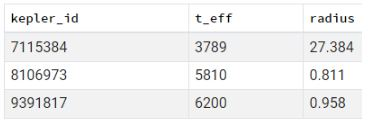

In [ ]:
INSERT INTO Star (kepler_id, t_eff, radius)
VALUES (7115384, 3789, 27.384),
(8106973, 5810, 0.811),
(9391817, 6200, 0.958)
;

### Your task is to fix the ```Planet``` table that has been corrupted.

There are two problems: some of the rows were copied with a negative radius and the unconfirmed planets were given fake Kepler names. To fix this, you'll have to:

> * Update the Kepler names of planets which don't have a confirmed status
> * Delete rows where the radius is negative.

In [ ]:
UPDATE Planet
SET kepler_name = NULL
WHERE status != 'CONFIRMED'
;

DELETE FROM Planet
WHERE radius < 0
;

### Create a new ```Planet``` table and fill it with the planets listed below.

Your table should consist of the following attributes in this order:

* kepler_id, as type ```INTEGER```
* koi_name, as type ```VARCHAR(15)```
* kepler_name, as type ```VARCHAR(15)```
* status, as type ```VARCHAR(20)```
* radius, as type ```FLOAT```

Add the following constraints:

* make all attributes NOT NULL except ```kepler_name```;
* make the ```koi_name``` a unique attribute.

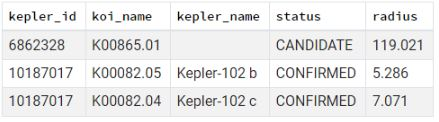

In [ ]:
CREATE TABLE Planet (
    kepler_id INTEGER NOT NULL,
    koi_name VARCHAR(15) NOT NULL UNIQUE,
    kepler_name VARCHAR(15),
    status VARCHAR(20) NOT NULL,
    radius FLOAT NOT NULL
    );

INSERT INTO Platnet VALUES
(6862328, 'K00865.01', NULL, 'CANDIDATE', 119.021),
(10187017, 'K00082.05', 'Kepler-102 b', 'CONFIRMED', 5.286),
(10187017, 'K00082.04', 'Kepler-102 c', 'CONFIRMED', 7.071)
;

SELECT *
FROM Planet
;

### Create the ```Star``` and ```Planet``` tables that we've been querying throughout these activities and fill the tables using the two CSV files which contain the star and planet data.

The tables and CSV files should contain the columns as follows:

* stars.csv:
  * ```kepler_id``` as an integer and primary key;
  * ```t_eff``` as an integer;
  * ```radius``` as a float.
* planets.csv:
  * ```kepler_id``` as an integer and a foreign key referencing Star on ```kepler_id```;
  * ```koi_name``` as a variable char (max 20) and primary key;
  * ```kepler_name``` as a variable char (max 20);
  * ```status``` as a variable char (max 20);
  * ```period``` as a float;
  * ```radius``` as a float;
  * ```t_eq``` as an integer


  Add the following other constrants to your tables:
* Ensure ```t_eff``` and ```radius``` in ```Star``` cannot be NULL
* Ensure the ```status``` in ```Planet``` cannot be NULL

In [ ]:
CREATE TABLE Star (
  kepler_id INTEGER PRIMARY KEY,
  t_eff INTEGER NOT NULL,
  radius FLOAT NOT NULL
);

COPY Star (kepler_id, t_eff, radius)
  FROM 'stars.csv' CSV
;

CREATE TABLE Planet (
  kepler_id INTEGER REFERENCES Star (kepler_id),
  koi_name VARCHAR(20) PRIMARY KEY,
  kepler_name VARCHAR(20),
  status VARCHAR(20) NOT NULL,
  period FLOAT,
  radius FLOAT,
  t_eq INTEGER
);

COPY Planet (kepler_id, koi_name, kepler_name, status, period, radius, t_eq)
  FROM 'planets.csv' CSV
;


### Modifying the table

Your task is to add two columns to the existing ```Star``` table to hold the equatorial coordinates as RA and declination angles and then fill the new columns with data. Call the attributes ```ra``` and ```decl```.

The new stars data, including the equatorial coordinates, is stored in stars_full.csv. The attributes in this file are ordered as follows:
(```kepler_id, t_eff, radius, ra, decl```)


In [ ]:
ALTER TABLE Star
 ADD COLUMN ra FLOAT,
 ADD COLUMN decl FLOAT
;

COPY Star (kepler_id, t_eff, radius, ra, decl)
  FROM 'stars_full.csv' CSV
;
